## The Data

In this project, I will be using a dataset of the LendingClub DataSet obtained from Kaggle.

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), I am are going to predict wether or nor a borrower will pay back their loan? This way in the future when I get a new potential customer I can assess whether or not they are likely to pay back the loan.

The "loan_status" column contains our label.


## Here We Go!

#### Provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('lc_info.csv',index_col='Features')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_account')

Number of mortgage accounts.


## Loading the data and other imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [7]:
df = pd.read_csv('lc_data.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amount           396030 non-null  int64  
 1   term                  396030 non-null  object 
 2   interest_rate         396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   job_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_income         396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_time            396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  


#  Exploratory Data Analysis


In [9]:
df.head()

,loan_amount,term,interest_rate,installment,grade,sub_grade,job_title,emp_length,home_ownership,annual_income,...,open_account,pub_records,revol_bal,revol_util,total_account,initial_list_status,application_type,mort_account,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


#### Create a countplot of the loan_amnt column.


<Axes: xlabel='loan_status', ylabel='count'>

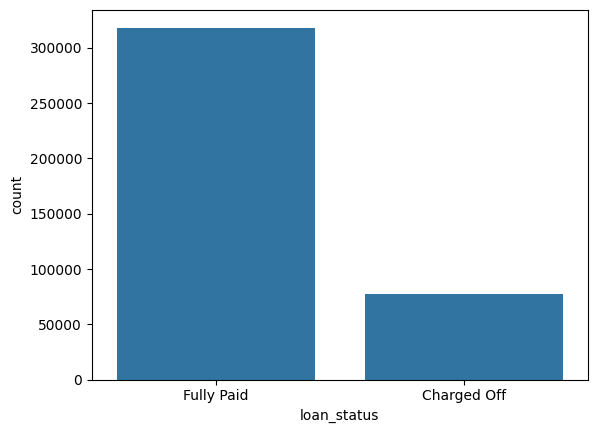

In [10]:
sns.countplot(x='loan_status',data=df)

**Create a histogram of the loan_amnt column.**

<Axes: >

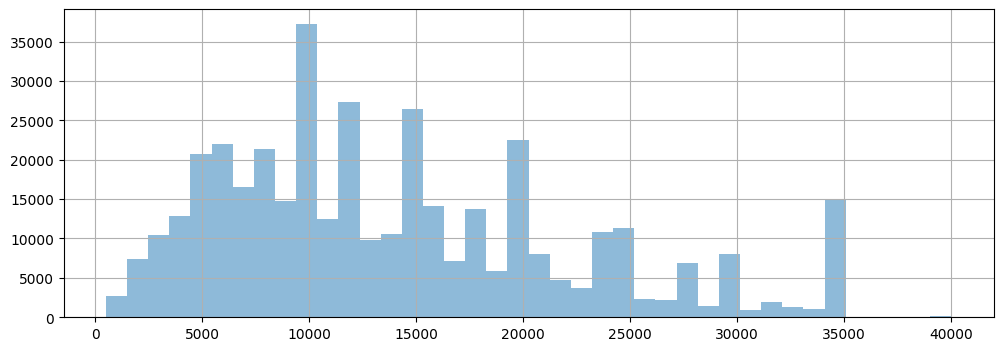

In [12]:
plt.figure(figsize=(12,4))
df['loan_amount'].hist(bins=40, alpha=0.5)

**Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [13]:
df.corr(numeric_only = True)

,loan_amount,interest_rate,installment,annual_income,dti,open_account,pub_records,revol_bal,revol_util,total_account,mort_account,pub_rec_bankruptcies
loan_amount,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
interest_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_income,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_account,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_records,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_account,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**Visualize this using a heatmap.**

(10.0, 0.0)

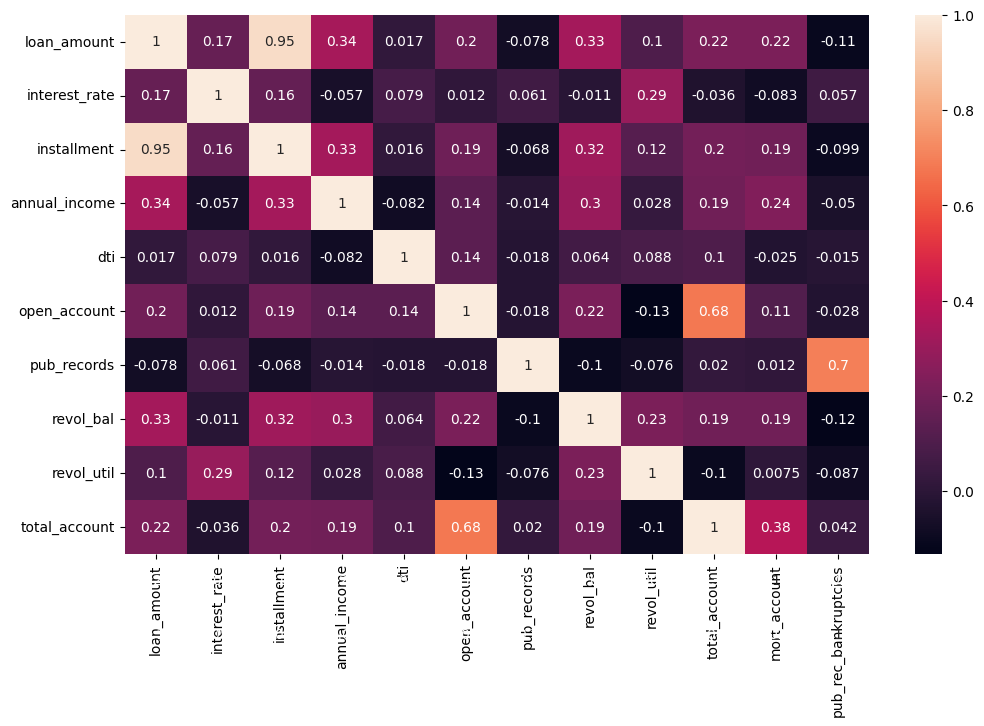

In [14]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(numeric_only = True), annot=True)
plt.ylim(10,0)

**You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

In [15]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [16]:
feat_info('loan_amount')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<Axes: xlabel='installment', ylabel='loan_amount'>

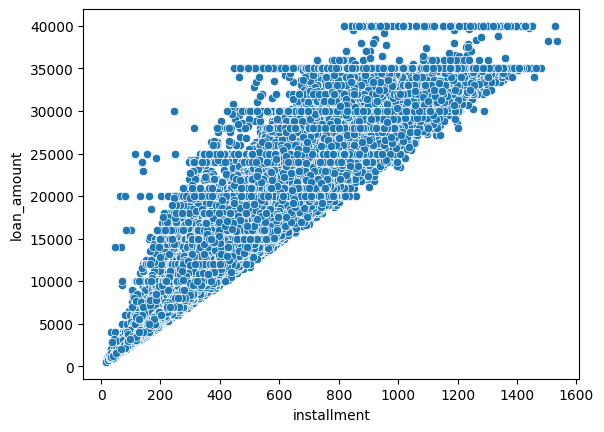

In [17]:
sns.scatterplot(x='installment', y='loan_amount',data=df)

**Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

<Axes: xlabel='loan_status', ylabel='loan_amount'>

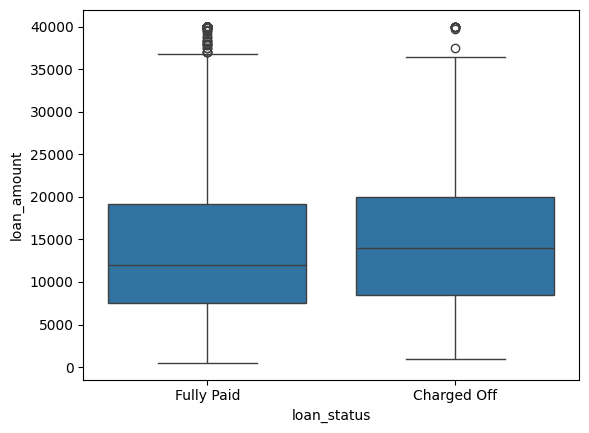

In [18]:
sns.boxplot(x='loan_status', y='loan_amount', data=df)

**Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [19]:
df.groupby('loan_status')['loan_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [20]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [21]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

**Create a countplot per grade. Set the hue to the loan_status label.**

<Axes: xlabel='grade', ylabel='count'>

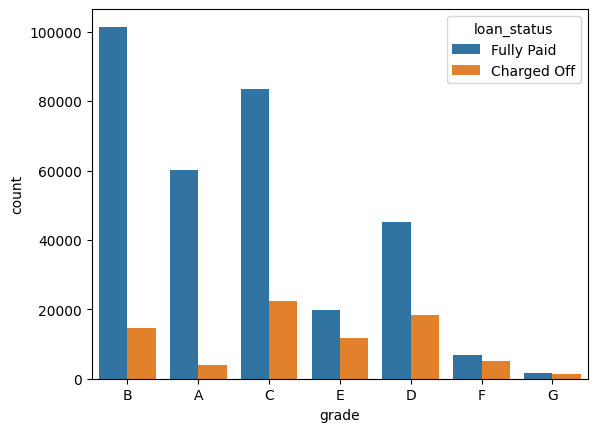

In [22]:
sns.countplot(x='grade', data=df, hue='loan_status')

**Display a count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"**

C:\Users\mujee\AppData\Local\Temp\ipykernel_28720\3676733108.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' )


<Axes: xlabel='sub_grade', ylabel='count'>

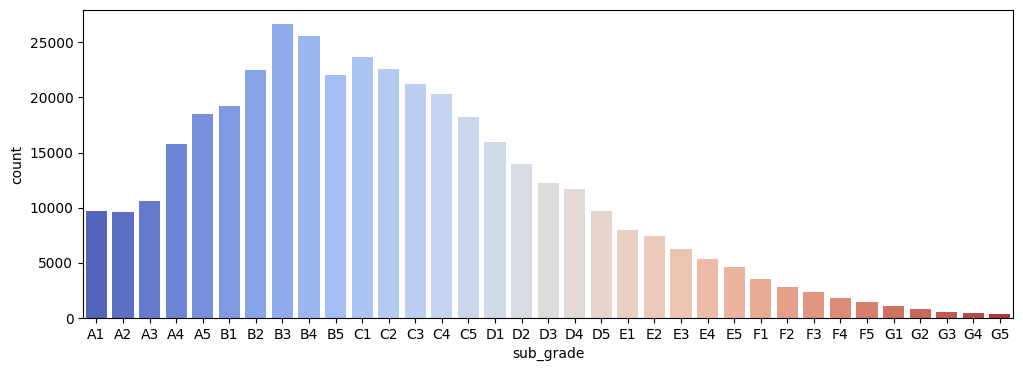

In [23]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' )

<Axes: xlabel='sub_grade', ylabel='count'>

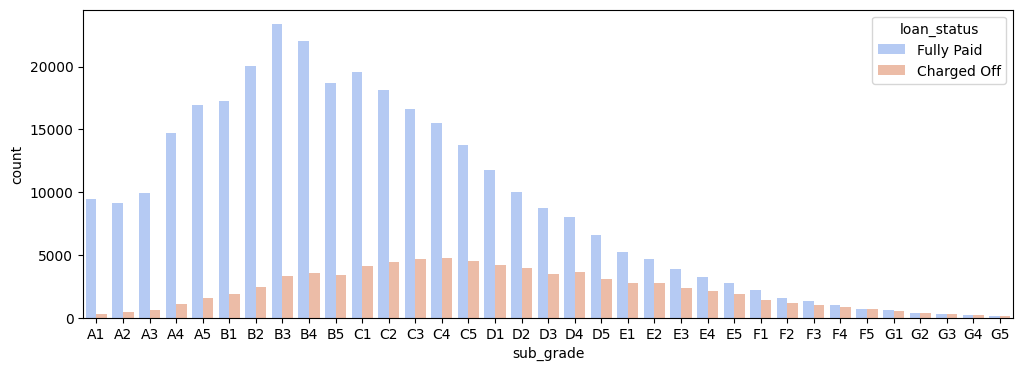

In [24]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm', hue='loan_status' )

**It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

<Axes: xlabel='sub_grade', ylabel='count'>

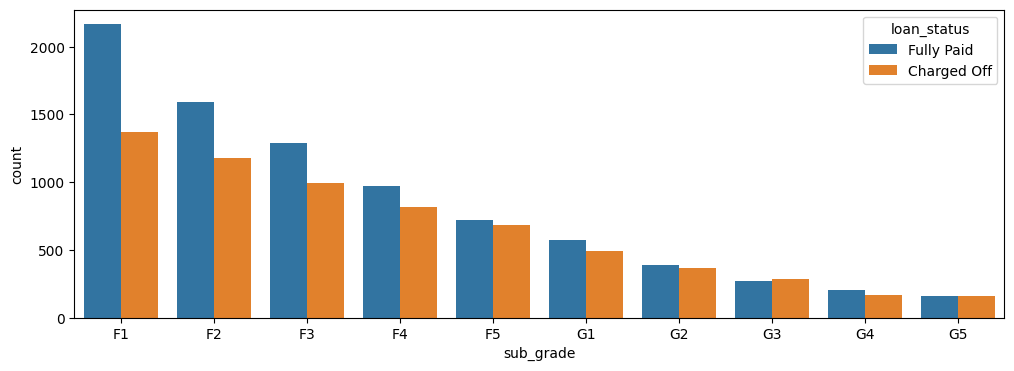

In [25]:
plt.figure(figsize=(12,4))

f_and_g = df[(df['grade'] == 'G') | (df['grade'] == 'F')]
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade', data=f_and_g,order=subgrade_order, hue='loan_status')

**Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [26]:
df['loan_status'].unique() 

array(['Fully Paid', 'Charged Off'], dtype=object)

In [27]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

In [28]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**Create a bar plot showing the correlation of the numeric features to the new loan_repaid column.**

<Axes: >

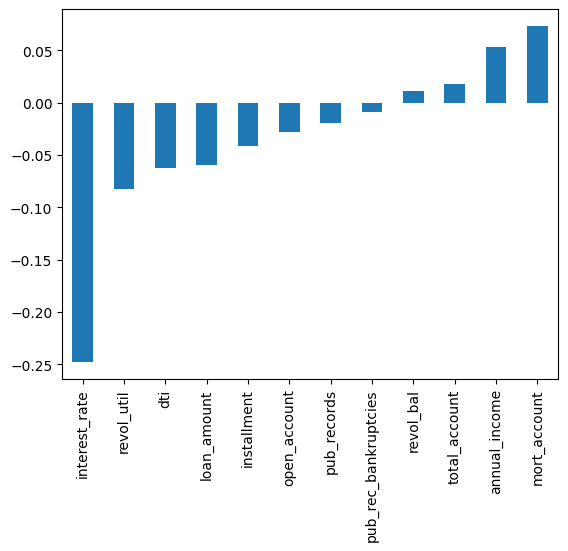

In [29]:
df.corr(numeric_only=True)['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

---
---
# Data PreProcessing

**Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [30]:
df.head()

,loan_amount,term,interest_rate,installment,grade,sub_grade,job_title,emp_length,home_ownership,annual_income,...,pub_records,revol_bal,revol_util,total_account,initial_list_status,application_type,mort_account,pub_rec_bankruptcies,address,loan_repaid
0,10000,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**What is the length of the dataframe?**

In [31]:
len(df)

396030

**Create a Series that displays the total count of missing values per column.**

In [32]:
df.isnull().sum()

loan_amount                 0
term                        0
interest_rate               0
installment                 0
grade                       0
sub_grade                   0
job_title               22927
emp_length              18301
home_ownership              0
annual_income               0
verification_status         0
issue_time                  0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_account                0
pub_records                 0
revol_bal                   0
revol_util                276
total_account               0
initial_list_status         0
application_type            0
mort_account            37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Convert this Series to be in term of percentage of the total DataFrame**

In [33]:
df.isnull().sum()*100/len(df)

loan_amount             0.000000
term                    0.000000
interest_rate           0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
job_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_income           0.000000
verification_status     0.000000
issue_time              0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_account            0.000000
pub_records             0.000000
revol_bal               0.000000
revol_util              0.069692
total_account           0.000000
initial_list_status     0.000000
application_type        0.000000
mort_account            9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [34]:
feat_info('job_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**How many unique employment job titles are there?**

In [35]:
df['job_title'].nunique()

173103

In [36]:
#it counts the occurrence of each unique value in the Series.
df['job_title'].value_counts()

job_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
sikorsky                      1
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Gracon Services, Inc          1
Name: count, Length: 173103, dtype: int64

**Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that job_title column.**

**Create a count plot of the emp_length feature column. Sort the order of the values.**

In [37]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [38]:
#emp_order should be a list of unique values in emp_length that determines the order in which they appear.
emp_order = ['< 1 year',
 '1 year',           
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

C:\Users\mujee\AppData\Local\Temp\ipykernel_28720\1906082021.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emp_length',data=df,order=emp_order,palette='viridis')


<Axes: xlabel='emp_length', ylabel='count'>

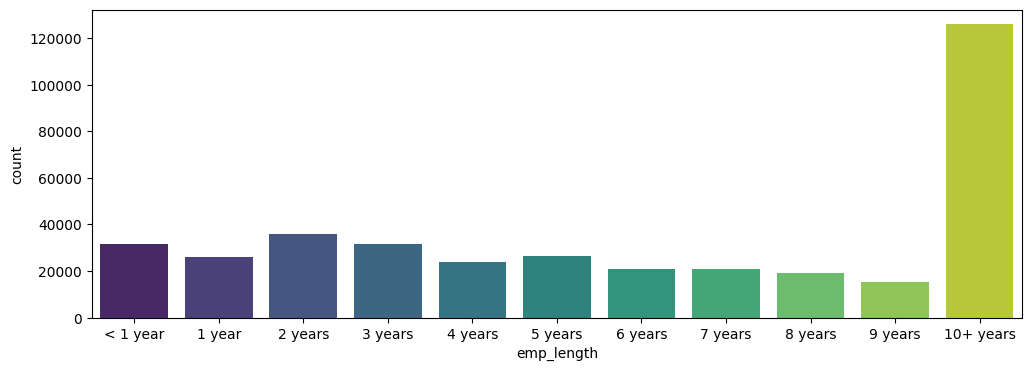

In [39]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_order,palette='viridis')

**Plot out the countplot with a hue separating Fully Paid vs Charged Off**

<Axes: xlabel='emp_length', ylabel='count'>

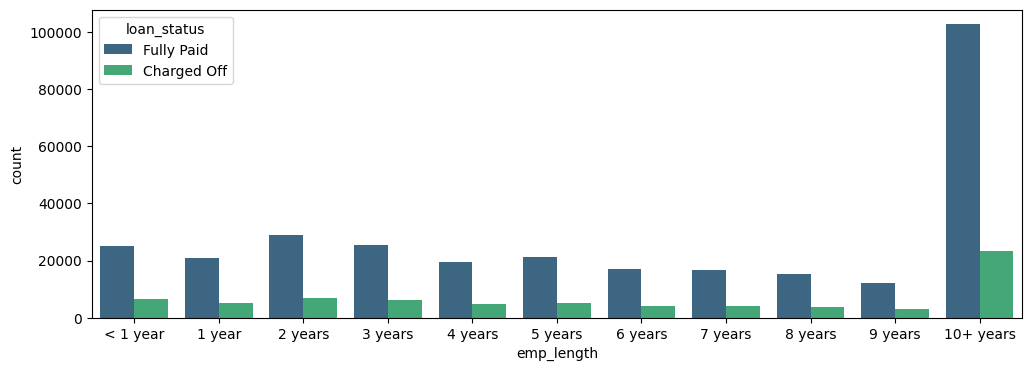

In [40]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_order,palette='viridis', hue='loan_status')

**This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html).**

In [41]:
emp_co = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']

In [42]:
emp_fp = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']

In [43]:
emp_len = emp_co/emp_fp

In [44]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<Axes: xlabel='emp_length'>

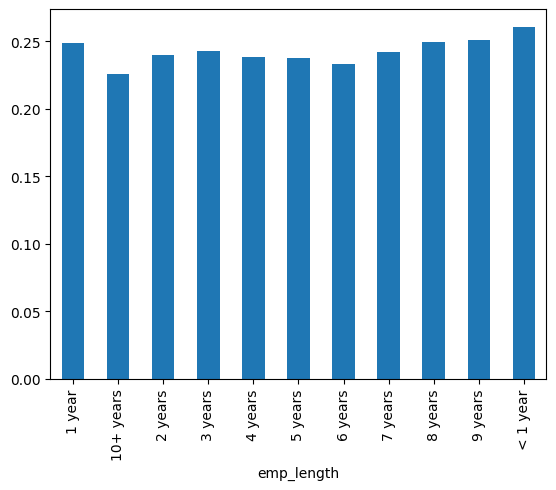

In [45]:
emp_len.plot(kind='bar')

**Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [46]:
df = df.drop('emp_length', axis=1)

**Revisit the DataFrame to see what feature columns still have missing data.**

In [47]:
df.isnull().sum()

loan_amount                 0
term                        0
interest_rate               0
installment                 0
grade                       0
sub_grade                   0
job_title               22927
home_ownership              0
annual_income               0
verification_status         0
issue_time                  0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_account                0
pub_records                 0
revol_bal                   0
revol_util                276
total_account               0
initial_list_status         0
application_type            0
mort_account            37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Review the title column vs the purpose column. Is this repeated information?**

In [48]:
df['purpose'].head()

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
Name: purpose, dtype: object

In [49]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**

In [50]:
df = df.drop('title', axis=1)

**Find out what the mort_acc feature represents**

In [51]:
feat_info('mort_account')

Number of mortgage accounts.


**Create a value_counts of the mort_acc column.**

In [52]:
df['mort_account'].value_counts()

mort_account
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

**There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columns to see which most highly correlates to mort_acc**

In [53]:
df.corr(numeric_only=True)['mort_account'].sort_values()

interest_rate          -0.082583
dti                    -0.025439
revol_util              0.007514
pub_records             0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_account            0.109205
installment             0.193694
revol_bal               0.194925
loan_amount             0.222315
annual_income           0.236320
total_account           0.381072
mort_account            1.000000
Name: mort_account, dtype: float64

**Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [54]:
print("Mean of mort_acc column per total_acc")
df.groupby('total_account')['mort_account'].mean()

Mean of mort_acc column per total_acc


total_account
2      0.000000
3      0.052023
4      0.066743
5      0.103289
6      0.151293
         ...   
124    1.000000
129    1.000000
135    3.000000
150    2.000000
151    0.000000
Name: mort_account, Length: 118, dtype: float64

**Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns.**


In [55]:
total_acc_avg = df.groupby('total_account')['mort_account'].mean()

In [56]:
total_acc_avg[5.0]

0.10328947368421053

In [57]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [58]:
df['mort_account'] = df.apply(lambda x : fill_mort_acc(x['total_account'], x['mort_account']), axis=1)

In [59]:
df.isnull().sum()

loan_amount                 0
term                        0
interest_rate               0
installment                 0
grade                       0
sub_grade                   0
job_title               22927
home_ownership              0
annual_income               0
verification_status         0
issue_time                  0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_account                0
pub_records                 0
revol_bal                   0
revol_util                276
total_account               0
initial_list_status         0
application_type            0
mort_account                0
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

In [60]:
df = df.dropna()

In [61]:
df.isnull().sum()

loan_amount             0
term                    0
interest_rate           0
installment             0
grade                   0
sub_grade               0
job_title               0
home_ownership          0
annual_income           0
verification_status     0
issue_time              0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_account            0
pub_records             0
revol_bal               0
revol_util              0
total_account           0
initial_list_status     0
application_type        0
mort_account            0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**List all the columns that are currently non-numeric.**


In [62]:
df.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'sub_grade', 'job_title', 'home_ownership',
       'verification_status', 'issue_time', 'loan_status', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [63]:
df['term'].value_counts()

term
36 months    281691
60 months     90647
Name: count, dtype: int64

In [64]:
df['term'] = df['term'].apply(lambda term : int(term[:3]))    

In [65]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 372338, dtype: int64

### grade feature

**We already know grade is part of sub_grade, so just drop the grade feature.**

In [66]:
df = df.drop('grade', axis=1)

In [67]:
df.columns

Index(['loan_amount', 'term', 'interest_rate', 'installment', 'sub_grade',
       'job_title', 'home_ownership', 'annual_income', 'verification_status',
       'issue_time', 'loan_status', 'purpose', 'dti', 'earliest_cr_line',
       'open_account', 'pub_records', 'revol_bal', 'revol_util',
       'total_account', 'initial_list_status', 'application_type',
       'mort_account', 'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

**Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [68]:
subgrade_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)
subgrade_dummies = subgrade_dummies.astype(int)    #to convert true/false into 1/0

# By setting drop_first=True, we drop the first category. This reduces the number of dummy variables by one, removing redundancy.

In [69]:
df = pd.concat([df.drop('sub_grade', axis=1), subgrade_dummies], axis=1)

In [70]:
df.columns

Index(['loan_amount', 'term', 'interest_rate', 'installment', 'job_title',
       'home_ownership', 'annual_income', 'verification_status', 'issue_time',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_account',
       'pub_records', 'revol_bal', 'revol_util', 'total_account',
       'initial_list_status', 'application_type', 'mort_account',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [71]:
df.head()

,loan_amount,term,interest_rate,installment,job_title,home_ownership,annual_income,verification_status,issue_time,loan_status,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000,36,11.44,329.48,Marketing,RENT,117000.0,Not Verified,Jan-15,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
1,8000,36,11.99,265.68,Credit analyst,MORTGAGE,65000.0,Not Verified,Jan-15,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
2,15600,36,10.49,506.97,Statistician,RENT,43057.0,Source Verified,Jan-15,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
3,7200,36,6.49,220.65,Client Advocate,RENT,54000.0,Not Verified,Nov-14,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
4,24375,60,17.27,609.33,Destiny Management Inc.,MORTGAGE,55000.0,Verified,Apr-13,Charged Off,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df.select_dtypes(['object']).columns

Index(['job_title', 'home_ownership', 'verification_status', 'issue_time',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [73]:
dummies = pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status', 'purpose']], drop_first=True)
dummies = dummies.astype(int)

In [74]:
df = df.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis=1)

In [75]:
df = pd.concat([df, dummies], axis=1)

In [76]:
df.columns

Index(['loan_amount', 'term', 'interest_rate', 'installment', 'job_title',
       'home_ownership', 'annual_income', 'issue_time', 'loan_status', 'dti',
       'earliest_cr_line', 'open_account', 'pub_records', 'revol_bal',
       'revol_util', 'total_account', 'mort_account', 'pub_rec_bankruptcies',
       'address', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3',
       'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5',
       'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2',
       'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_b

### home_ownership
**Review the value_counts for the home_ownership column.**

In [77]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    187088
RENT        151363
OWN          33753
OTHER          105
NONE            28
ANY              1
Name: count, dtype: int64

**Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [78]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [79]:
home_dummies = pd.get_dummies(df['home_ownership'], drop_first=True)
home_dummies = home_dummies.astype(int)

In [80]:
df = df.drop('home_ownership', axis=1)
df = pd.concat([df, home_dummies], axis=1)

In [81]:
df.columns

Index(['loan_amount', 'term', 'interest_rate', 'installment', 'job_title',
       'annual_income', 'issue_time', 'loan_status', 'dti', 'earliest_cr_line',
       'open_account', 'pub_records', 'revol_bal', 'revol_util',
       'total_account', 'mort_account', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       '

### address
**Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [82]:
df.columns

Index(['loan_amount', 'term', 'interest_rate', 'installment', 'job_title',
       'annual_income', 'issue_time', 'loan_status', 'dti', 'earliest_cr_line',
       'open_account', 'pub_records', 'revol_bal', 'revol_util',
       'total_account', 'mort_account', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       '

In [83]:
df['zip_code'] = df['address'].apply(lambda address : address[-5:])

**Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [84]:
zip_dummies = pd.get_dummies(df['zip_code'], drop_first=True)
zip_dummies = zip_dummies.astype(int)

In [85]:
df['zip_code']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zip_code, Length: 372338, dtype: object

In [86]:
df=df.drop(['address', 'zip_code'], axis=1)

In [87]:
df = pd.concat([df,zip_dummies], axis=1)

In [88]:
df.columns

Index(['loan_amount', 'term', 'interest_rate', 'installment', 'job_title',
       'annual_income', 'issue_time', 'loan_status', 'dti', 'earliest_cr_line',
       'open_account', 'pub_records', 'revol_bal', 'revol_util',
       'total_account', 'mort_account', 'pub_rec_bankruptcies', 'loan_repaid',
       'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3',
       'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5',
       'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vac

### issue_time

**TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [89]:
df = df.drop('issue_time', axis=1)

### earliest_cr_line
**This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [90]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date : int(date[-2:]))

In [91]:
df = df.drop('earliest_cr_line', axis=1)

In [92]:
df.select_dtypes(['object']).columns

Index(['job_title', 'loan_status'], dtype='object')

In [93]:
df = df.drop('job_title', axis=1)

In [94]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

## Train Test Split

**Import train_test_split from sklearn.**

In [95]:
from sklearn.model_selection import train_test_split

**drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [96]:
df = df.drop('loan_status', axis=1)

**TASK: Set X and y variables to the .values of the features and label.**

In [97]:
X = df.drop('loan_repaid', axis=1).values

#The .values attribute is used to convert a pandas Series or DataFrame into a numpy array, 
#which is often required for compatibility with machine learning libraries, numerical operations.

In [98]:
y = df['loan_repaid'].values

**Perform a train/test split.**

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

**Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [100]:
from sklearn.preprocessing import MinMaxScaler

In [101]:
scaler = MinMaxScaler()

In [102]:
X_train = scaler.fit_transform(X_train)

In [103]:
X_test = scaler.transform(X_test)

# Creating the Model

**Run the cell below to import the necessary Keras functions.**

In [104]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

**Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [105]:
# Choose whatever number of layers/neurons you want.
model = Sequential()

model.add(Dense(78, activation = 'relu'))
model.add(Dropout(0.15))

model.add(Dense(35, activation = 'relu'))
model.add(Dropout(0.15))

model.add(Dense(18, activation = 'relu'))
model.add(Dropout(0.15))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

**Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [106]:
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256, validation_data=(X_test, y_test))

#An epoch is one complete cycle through the full training dataset. During one epoch, the model processes each example in the training dataset exactly once.

Epoch 1/25
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.3577 - val_loss: 0.2575
Epoch 2/25
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2633 - val_loss: 0.2559
Epoch 3/25
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2589 - val_loss: 0.2557
Epoch 4/25
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2571 - val_loss: 0.2546
Epoch 5/25
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2560 - val_loss: 0.2540
Epoch 6/25
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2550 - val_loss: 0.2538
Epoch 7/25
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.2543 - val_loss: 0.2540
Epoch 8/25
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.2540 - val_loss: 0.2540
Epoch 9/25
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.2554 - val_loss: 0.2536
Epoch 10/25
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.2544 - val_loss: 0.2535
Epoch 11/25
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2533 - val_loss: 0.2536
Epoch 12/25
1164/1164 ━━━━━━━

# Evaluating Model Performance.

**Plot out the validation loss versus the training loss.**

In [107]:
losses = pd.DataFrame(model.history.history)

<Axes: >

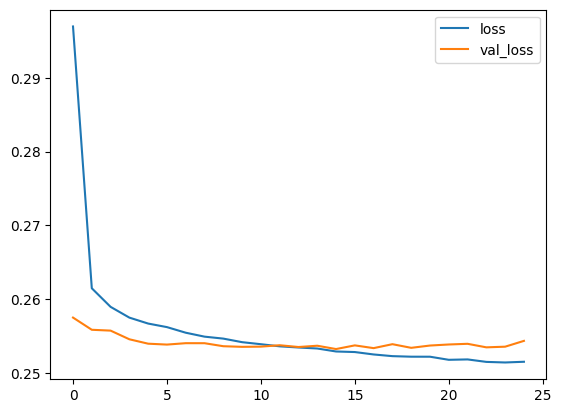

In [108]:
losses[['loss', 'val_loss']].plot()

**Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [109]:
from sklearn.metrics import classification_report, confusion_matrix

In [110]:
predictions_prob = model.predict(X_test)   

#To resolve this, you need to ensure that your predictions are in the form of discrete class labels (e.g., 0 or 1 for binary classification) before passing them to classification_report
#Convert Probabilities to Class Labels: If your model outputs probabilities, you need to convert these probabilities into class labels by setting a threshold (e.g., 0.5 for binary classification).

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [111]:
predictions = (predictions_prob >= 0.5).astype(int)

In [112]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     14367
           1       0.88      1.00      0.94     60101

    accuracy                           0.89     74468
   macro avg       0.93      0.72      0.77     74468
weighted avg       0.90      0.89      0.87     74468



In [113]:
print(confusion_matrix(y_test, predictions))

[[ 6365  8002]
 [  146 59955]]


In [114]:
len(df)

372338

**Given the customer below, would you offer this person a loan?**

In [115]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

#random.seed(101)->Setting a seed ensures that the random number generation is reproducible. Every time you run this code with the same seed, you will get the same random numbers.

#random_ind = random.randint(0, len(df))-> The generated integer will be used as an index to select a random row from the DataFrame.

#.iloc[random_ind]: This selects the row at the index random_ind from the modified DataFrame. iloc is used for integer-location based indexing.

loan_amount          9600.00
term                   36.00
interest_rate           7.69
installment           299.46
annual_income       35000.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year        6.00
Name: 324091, Length: 78, dtype: float64

In [116]:
model.predict(new_customer.values.reshape(1,78))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[1.]], dtype=float32)

**Now check, did this person actually end up paying back their loan?**

In [117]:
df.iloc[random_ind]['loan_repaid']

1.0

# Hence, our model has correctly predicted the loan approval!